**Exercise 7.2**
Instead of having a single output dimension, i.e.

$$
P(y^{(i)}|\boldsymbol{x}^{(i)}) = \mathcal{N}(\boldsymbol{w}^T\boldsymbol{x}^{(i)}, \sigma^2),
$$

where the upper index enumerates the sample item, we now have multiple outputs which are independent. So we can 
write the PDF for each individual sample item as an MVN with diagonal covariance matrix, i.e.

$$
P(\boldsymbol{y}^{(i)}|\boldsymbol{x}^{(i)}) = \mathcal{N}(\boldsymbol{W}^T\boldsymbol{x}^{(i)}, \sigma^2 \boldsymbol{I}).
$$

Here, $\boldsymbol{y} \in \mathbb{R}^M$, \$\boldsymbol{x} \in \mathbb{R}^D$ and

$$
\boldsymbol{W}^T = \begin{pmatrix} \boldsymbol{w}^T_1 \\ \vdots \\ \boldsymbol{w}^T_M \end{pmatrix},
$$

is a $M \times D$ matrix.


In [1]:
import numpy

In [2]:
X = numpy.matrix([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])

In [4]:
Y = numpy.matrix([[-1,-1],[-1,-2],[-2,-1],[1,1],[1,2],[2,1]])

The MLE factorizes since each output is independent:

$$
\hat{\boldsymbol{w}}_j = (\boldsymbol{X}^T\boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{Y}_{:,j}
$$

In [16]:
(X.T*X)**(-1)*X.T * Y

matrix([[-1.33333333, -1.33333333],
        [ 1.33333333,  1.33333333]])

Training data is essentially the same for both outputs. We have -1 twice and -2 once on the left side ($x=0$) and twice 1 and once 2 on the right side ($x=1$).

**Exercise 7.3**

Optimizer of

$$
J(\boldsymbol{w}, w_0) = (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} - w_0 \boldsymbol{I})^T(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} - w_0 \boldsymbol{I}) + \lambda \boldsymbol{w}^T \boldsymbol{w}
$$

assuming that $\bar{\boldsymbol{x}} = 0$.

$$
\begin{align}
J(\boldsymbol{w}, w_0) &= (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} - w_0 \boldsymbol{I})^T(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} - w_0 \boldsymbol{I}) + \lambda \boldsymbol{w}^T \boldsymbol{w} \\
&= (\hat{\boldsymbol{y}} - \boldsymbol{X} \boldsymbol{w})^T(\hat{\boldsymbol{y}} - \boldsymbol{X} \boldsymbol{w}) + \lambda \boldsymbol{w}^T \boldsymbol{w} \\
&= \hat{\boldsymbol{y}}^T \hat{\boldsymbol{y}} - \boldsymbol{w}^T \boldsymbol{X}^T \hat{\boldsymbol{y}} - \hat{\boldsymbol{y}}^T \boldsymbol{X} \boldsymbol{w} +  \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} + \lambda \boldsymbol{w}^T \boldsymbol{w} \\
&= \hat{\boldsymbol{y}}^T \hat{\boldsymbol{y}} - 2 \boldsymbol{w}^T \boldsymbol{X}^T \hat{\boldsymbol{y}} +  \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} + \lambda \boldsymbol{w}^T \boldsymbol{w} \\
&= \boldsymbol{y}^T \boldsymbol{y} - 2 w_0 \boldsymbol{1}^T \boldsymbol{y} + w_0^2 \boldsymbol{1}^T \boldsymbol{1} - 2 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{y} + 2 w_0 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} + \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} + \lambda \boldsymbol{w}^T \boldsymbol{w} \\
\end{align}
$$

We have

$$
\boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} = \boldsymbol{w}^T (\sum_k X_{ki}) = 0
$$

Then the proposition easily follows.

**Exercise 7.4**
MLE for $\sigma^2$ for linear regression.

$$
\begin{align}
\log P(\boldsymbol{y}|\boldsymbol{X}, \sigma^2)
&= - \sum_i \frac{1}{2 \sigma^2} (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w})^T (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w}) - \frac{N}{2} \log 2 \pi \sigma^2 
\end{align}
$$

$$
\begin{align}
\frac{\mathrm{d}}{\mathrm{d}\sigma^2} \log P(\boldsymbol{y}|\boldsymbol{X}, \sigma^2)
&=  \frac{1}{2 \sigma^4} \sum_i (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w})^T (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w}) - \frac{N}{2} \frac{1}{\sigma^2} 
\end{align}
$$

Equating to zero gives the desired MLE estimate:

$$
\sigma^2 = \frac{1}{N} \sum_i (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w})^T (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w})
$$

**Exercise 7.5** MLE for explicit form $w_0 + \boldsymbol{w}^T$

$$
\begin{align}
\log P(\boldsymbol{y}|\boldsymbol{X}, \sigma^2)
&= - \sum_i \frac{1}{2 \sigma^2} (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w}-w_0 \boldsymbol{1})^T (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{w} - w_0 \boldsymbol{1}) - \frac{N}{2} \log 2 \pi \sigma^2 
\end{align}
$$

In 7.3. we showed that the optimizer is of the form

$$
\boldsymbol{y}^T \boldsymbol{y} - 2 w_0 \boldsymbol{1}^T \boldsymbol{y} + w_0^2 \boldsymbol{1}^T \boldsymbol{1} - 2 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{y} + 2 w_0 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} + \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w}
$$

Collecting terms we have

$$
\begin{align}
\frac{\mathrm{d}}{\mathrm{d}w_0} \left( - 2 w_0 \boldsymbol{1}^T \boldsymbol{y} + w_0^2 \boldsymbol{1}^T \boldsymbol{1} + 2 w_0 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} \right)
&= -2 N \bar{y} + 2 w_0 N + 2 \boldsymbol{w}^T \bar{\boldsymbol{x}}
\end{align}
$$

$$
\begin{align}
\frac{\mathrm{d}}{\mathrm{d} \boldsymbol{w}} \left(
- 2 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{y} + 2 w_0 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} + \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w}\right) 
&= - 2 \boldsymbol{X}^T \boldsymbol{y} - 2 \bar{\boldsymbol{x}}^T \boldsymbol{w} \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} + 2 (\bar{y} - \bar{\boldsymbol{x}}^T \boldsymbol{w}) \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{1} + \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} +  \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \\
&= - 2 \boldsymbol{X}^T \boldsymbol{y} - 2 \bar{\boldsymbol{x}}^T \boldsymbol{w} \boldsymbol{w}^T \bar{\boldsymbol{x}} + 2 \bar{y} \boldsymbol{w}^T \bar{\boldsymbol{x}} - 2 \bar{\boldsymbol{x}}^T \boldsymbol{w} \boldsymbol{w}^T \bar{\boldsymbol{x}} + 2 \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} \\
\end{align}
$$

**Exercise 7.6** MLE for simple linear regression

Simple linear regression means

$$
P(y_i|x_i) = \mathcal{N}(w_0 + w_1 x_i) = \frac{1}{\sqrt{2 \pi} \sigma} \exp(y_i - w_0 - w_1 x_i)^2/2\sigma)
$$

We can just plug into the result from 7.5.

**Exercise 7.7**
This is a simple linear regression problem. The given statistics are the textbook statistics in "classical" linear regression problems.

a.+b. From 7.6 we find

$$
\hat{w}_1 = \frac{C_{xy}}{C_{xx}}
$$

and
$$
\hat{w}_0 = \bar{y} - \hat{w}_1 \bar{x}
$$

c.

$$
\bar{x}^{(n+1)} = \frac{\sum_{i=1}^{N+1} x_i}{N+1} = \frac{\bar{x}^{(n)} N + x_{N+1}}{N+1} = \frac{N}{N+1} \bar{x}^{(n)} + \frac{1}{N+1} x_{N+1}
$$

d.

$$
\begin{align}
C_{xy}^{(n+1)} = \frac{1}{n+1} \sum_{i=1}^{n+1} (x_i-\bar{x}^{(n+1)})(y_i-\bar{y}^{(n+1)})
\end{align}
$$

$$
x_i - \bar{x}^{(n+1)} = x_i - \frac{n}{n+1} \bar{x}^{(n)} - \frac{1}{n+1} x_{n+1}
$$

$$
\begin{align}
x_{n+1} - \bar{x}^{(n)} &= (n+1)\bar{x}^{(n+1)} - (n+1)\bar{x}^{(n)} \\
x_{n+1}  &= (n+1)\bar{x}^{(n+1)} - (n+1)\bar{x}^{(n)} + \bar{x}^{(n)} \\
x_{n+1}  &= (n+1)\bar{x}^{(n+1)} - n \bar{x}^{(n)} \\
\end{align}
$$

$$
\begin{align}
\left(x_i - \bar{x}^{(n+1)}\right)\left(y_i - \bar{y}^{(n+1)}\right)
&= \left[x_i - \bar{x}^{(n)} - \frac{1}{n+1}(x_{n+1}-\bar{x}^{(n)}) \right] \left[y_i - \bar{y}^{(n)} - \frac{1}{n+1}(y_{n+1}-\bar{y}^{(n)}) \right] \\
&= \left(x_i - \bar{x}^{(n)}\right) \left(y_i - \bar{y}^{(n)}\right) - y_i \frac{1}{n+1}\left(x_{n+1}-\bar{x}^{(n)}\right) + \bar{y}^{(n)} \frac{1}{n+1}\left(x_{n+1}-\bar{x}^{(n)}\right) - x_i \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) + \bar{x}^{(n)} \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) + \frac{1}{n+1}\left(x_{n+1}-\bar{x}^{(n)}\right) \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) 
\end{align}
$$


$$
\begin{align}
(n+1) C_{xy}^{(n+1)} 
&= n C_{xy}^{(n)} - \bar{y}^{(n+1)} \left(x_{n+1}-\bar{x}^{(n)}\right) + \bar{y}^{(n)} \left(x_{n+1}-\bar{x}^{(n)}\right) - \bar{x}^{(n+1)} \left(y_{n+1}-\bar{y}^{(n)}\right) + \bar{x}^{(n)}  \left(y_{n+1}-\bar{y}^{(n)}\right) + \left(x_{n+1}-\bar{x}^{(n)}\right) \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) \\
&= n C_{xy}^{(n)} + \left(\bar{y}^{(n)} - \bar{y}^{(n+1)}\right) \left(x_{n+1}-\bar{x}^{(n)}\right) + \left( \bar{x}^{(n)} - \bar{x}^{(n+1)} \right) \left(y_{n+1}-\bar{y}^{(n)}\right) + \left(x_{n+1}-\bar{x}^{(n)}\right) \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) \\
&= n C_{xy}^{(n)} - \frac{1}{n+1} \left(y_{n+1} - \bar{y}^{(n)}\right) \left(x_{n+1}-\bar{x}^{(n)}\right) - \frac{1}{n+1} \left( x_{n+1} - \bar{x}^{(n)} \right) \left(y_{n+1}-\bar{y}^{(n)}\right) + \left(x_{n+1}-\bar{x}^{(n)}\right) \frac{1}{n+1}\left(y_{n+1}-\bar{y}^{(n)}\right) \\
&= n C_{xy}^{(n)} - \frac{1}{n+1} \left(y_{n+1} - \bar{y}^{(n)}\right) \left(x_{n+1}-\bar{x}^{(n)}\right) \\
&= n C_{xy}^{(n)} - (n+1) \left(\bar{x}^{(n+1)} - \bar{x}^{(n)}\right) \left(\bar{y}^{(n+1)} - \bar{y}^{(n)}\right) \\
&= n C_{xy}^{(n)} - (n+1) \left(\bar{x}^{(n+1)} \bar{y}^{(n+1)} - \bar{x}^{(n)} \bar{y}^{(n+1)} - \bar{x}^{(n+1)}\bar{y}^{(n)}+ \bar{x}^{(n)}\bar{y}^{(n)}\right) \\
\end{align}
$$

Giving up here for now..

To get an expression for $C_{xx}$ we can just replace all $y$ by $x$

In [53]:
import numpy, numpy.random, numpy.linalg

In [2]:
rng = numpy.random.default_rng()

In [57]:
xtrain = numpy.mgrid[0:20:21j]

In [59]:
ytrain = -1.5*xtrain + 1./9.*xtrain**2 + rng.standard_normal(21)*2.

Normal equation:

$$
\boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} = \boldsymbol{X}^T \boldsymbol{y}
$$

In [60]:
X = numpy.vstack((numpy.ones_like(xtrain), xtrain)).T

In [61]:
w = numpy.linalg.inv(X.T@X)@X.T@ytrain

In [64]:
from matplotlib import pyplot as plt

In [65]:
%matplotlib inline

%config InlineBackend.close_figures=False # keep figures open in pyplot

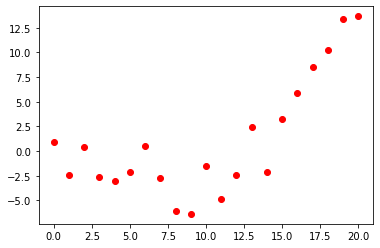

In [66]:
plt.plot(xtrain, ytrain, "ro")

In [67]:
plt.plot(xtrain, w[0]+w[1]*xtrain)

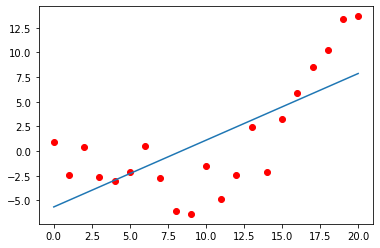

In [68]:
plt.show()

Online update. The way we do it here sort of defeats the whole purpose of online-updating but we can do without loops that way.

Let the array index denote $n$, starting from zero. Then

`cxy[n]=(1/n)(x[n]y[n] + (n-1) cxy[n-1] + (n-1) xbar[n-1] ybar[n-1] - n * xbar[n] ybar[n]`

where we define `cxy[0]=0`.

In [72]:
xbar=numpy.cumsum(xtrain)/len(xtrain)

In [73]:
ybar=numpy.cumsum(ytrain)/len(ytrain)

`xbp[n] = xbar[n-1]`, `nbp[n] = n-1`

In [104]:
xbp = numpy.pad(xbar,(1,0))[0:21]

In [105]:
ybp = numpy.pad(ybar,(1,0))[0:21]

In [94]:
n = numpy.mgrid[0:20:21j]

In [106]:
nbp = numpy.pad(numpy.mgrid[0:20:21j], (1,0))[0:21]

In [113]:
updatecxy = 1/n[1:]*(xtrain*ytrain + nbp * xbp*ybp - n*xbar*ybar)[1:]

In [114]:
cxy = numpy.cumsum(n[1:]*updatecxy)

In [116]:
updatecxx = 1/n[1:]*(xtrain*xtrain + nbp * xbp*xbp - n*xbar*xbar)[1:]

In [117]:
cxx = numpy.cumsum(n[1:]*updatecxx)

In [118]:
cxy/cxx

array([-2.45184643, -0.32158343, -0.68381108, -0.72357601, -0.58959466,
       -0.31646686, -0.33926164, -0.47488811, -0.54462298, -0.43590024,
       -0.4355455 , -0.37686614, -0.24321829, -0.21501698, -0.11162577,
        0.00750441,  0.13888401,  0.27472134,  0.43848846,  0.6112541 ])

In [121]:
ybar[1:] - cxy/cxx*xbar[1:]

array([ 4.52138215e-02, -5.59605746e-03,  1.76682873e-02,  2.27375085e-02,
       -3.30772752e-03, -8.30369441e-02, -7.57750707e-02, -4.08562917e-03,
        4.50877263e-02, -5.08155282e-02, -5.33809631e-02, -1.36860819e-01,
       -3.68818798e-01, -4.48605041e-01, -7.31869896e-01, -1.13686213e+00,
       -1.69537667e+00, -2.43053068e+00, -3.52376347e+00, -5.01821474e+00])

In [119]:
w

array([-5.66993094,  0.67642572])

In [149]:
cxynew = numpy.zeros((21))
cxxnew = numpy.zeros((21))

for n in range(20):
    cxynew[n+1]=1/(n+1)*(xtrain[n+1]*ytrain[n+1] + n * cxy[n] + n* xbar[n] * ybar[n] - (n+1) * xbar[n+1] * ybar[n+1])
    cxxnew[n+1]=1/(n+1)*(xtrain[n+1]*xtrain[n+1] + n * cxx[n] + n* xbar[n] * xbar[n] - (n+1) * xbar[n+1] * xbar[n+1])                      

In [156]:
cxynew = numpy.zeros((21))
cxxnew = numpy.zeros((21))

for n in range(20):
    cxynew[n+1]=1/(n+1)*(xtrain[n+1]*ytrain[n+1] + n* xbar[n] * ybar[n] - (n+1) * xbar[n+1] * ybar[n+1])
    cxxnew[n+1]=1/(n+1)*(xtrain[n+1]*xtrain[n+1] +  n* xbar[n] * xbar[n] - (n+1) * xbar[n+1] * xbar[n+1])                      

In [147]:
cxynew, updatecxy

(array([ 0.        , -2.44628669,  0.4257477 , -2.60369995, -2.91127106,
        -1.97453257,  0.67065918, -2.33928914, -5.30471895, -5.22196798,
        -0.52112357, -3.19466058, -0.79247876,  3.28837889, -0.22591434,
         3.94961215,  5.62080154,  6.8464713 ,  7.16243635,  7.87200964,
         6.53591521]),
 array([-2.44628669,  0.4257477 , -2.60369995, -2.91127106, -1.97453257,
         0.67065918, -2.33928914, -5.30471895, -5.22196798, -0.52112357,
        -3.19466058, -0.79247876,  3.28837889, -0.22591434,  3.94961215,
         5.62080154,  6.8464713 ,  7.16243635,  7.87200964,  6.53591521]))

$$
c_{n} = a + b c_{n-1}
$$

Ansatz with generating function:

$$
\begin{align}
\sum_{k=1}^\infty c_k z^k &= \sum_{k=1}^\infty a z^k + b \sum_{k=1}^\infty c_{k-1} z^k \\
\sum_{k=0}^\infty c_k z^k - c_0 &= \sum_{k=0}^\infty a z^k - a + b z \sum_{k=1}^\infty c_{k-1} z^{k-1} \\
\sum_{k=0}^\infty c_k z^k - c_0 &= \sum_{k=0}^\infty a z^k - a + b z \sum_{k=0}^\infty c_{k} z^{k} \\
C(z) &= \frac{a}{1-z} - a + b z C(z) + c_0\\
C(z) &= \frac{1}{1-b z} \left(\frac{a}{1-z} - a\right) + \frac{c_0}{1-b z}\\
&=  \frac{a}{1-bz} \left(\frac{1}{1-z} - 1\right) + \frac{c_0}{1-bz}\\
&=  \frac{a}{1-bz} \left(\frac{1-1+z}{1-z}\right) + \frac{c_0}{1-bz}\\
&=  \frac{a}{1-bz} \frac{z}{1-z} + \frac{c_0}{1-bz}\\
&=  \frac{a}{b-1}\frac{1}{1-bz} - \frac{a}{b-1}\frac{1}{1-z} + \frac{c_0}{1-bz}\\
&= \frac{a}{b-1} \sum_k b^k z^k - \frac{a}{b-1} \sum_k z^k + c_0 \sum_k b^k z^k \\
\end{align}
$$

**Exercise 7.9** Discriminative approach

For an individual observation we have the conditional probability
$$
P(y|\boldsymbol{x}) = \mathcal{N}(w_0 + \boldsymbol{w}^T \boldsymbol{x}, \sigma^2)
$$

The discriminative approach fits the $D+1$-dimensional MVN as a joint probability:

$$
P(\boldsymbol{x}, y) = \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

Let us assume $N$ observation pairs $(\boldsymbol{x}^i, y^i)$ where $\boldsymbol{x}^i \in \mathbb{R}^D$. 
MLE for MVN is
$$
\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_i \boldsymbol{\xi}^i
$$
and
$$
\hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_i (\boldsymbol{\xi}^i - \hat{\boldsymbol{\xi}})(\boldsymbol{\xi}^i - \hat{\boldsymbol{\xi}})^T,
$$

where
$$
\boldsymbol{\xi}^i (\boldsymbol{\xi}^i)^T
= \begin{pmatrix} x^i_1 \\ \vdots \\ x^i_D \\ y^i \end{pmatrix} \begin{pmatrix} x^i_1 & \cdots & x^i_D & y^i \end{pmatrix}
= \begin{pmatrix} (x^i_1)^2 & x^i_1 x^i_2 & \cdots & x^i_1 x^i_D & x^i_1 y^i \\ \vdots & & & \vdots & \vdots \\ x^i_D x^i_1 & x^i_D x^i_2 & \cdots & (x^i_D)^2 & x^i_D y^i \\ y^i x^i_1 & y^i x^i_2 & \cdots & y^i x^i_D & (y^i)^2 \end{pmatrix}
$$

We can separate that into
$$
\hat{\boldsymbol{\mu}}_x = \frac{1}{N} \sum_i \boldsymbol{x}^i,
$$
$$
\hat{\mu}_y = \frac{1}{N} \sum_i y^i,
$$

and
$$
\hat{\boldsymbol{\Sigma}}_{xx} = \frac{1}{N} \sum_i (\boldsymbol{x}^i - \hat{\boldsymbol{\mu}}_x)(\boldsymbol{x}^i - \hat{\boldsymbol{\mu}}_x)^T,
$$

$$
\hat{\sigma}_{yy} = \frac{1}{N} \sum_i (y_i - \hat{\mu}_y)^2,
$$

and
$$
\hat{\boldsymbol{\Sigma}}_{xy} = \frac{1}{N} \sum_i (\boldsymbol{x}^i - \hat{\boldsymbol{\mu}}_x)(y^i - \hat{\mu}_y)^T,
$$

$$
\begin{align}
\left(\boldsymbol{X}_C^T \boldsymbol{X}_C\right)_{ij}
&= \sum_{k=0}^N \left(\boldsymbol{X}_C\right)_{ki} \left(\boldsymbol{X}_C\right)_{kj} \\
&= \sum_{k=0}^N \left(\boldsymbol{X} - \boldsymbol{1}_N \boldsymbol{\mu}^T \right)_{ki} \left(\boldsymbol{X} - \boldsymbol{1}_N \boldsymbol{\mu}^T\right)_{kj} \\
&= \sum_{k=0}^N (X_{ki} - \mu_{i}) (X_{kj} - \mu_{j}) \\
&= \sum_{k=0}^N (x^k_i - \mu_i)(x^k_j - \mu_j) \\
&= N \left(\hat{\boldsymbol{\Sigma}}_{xx}\right)_{ij}
\end{align}
$$

Similarly,

$$
\boldsymbol{X}^T_C \boldsymbol{y} = N \hat{\boldsymbol{\Sigma}}_{xy}
$$

Exploiting the symmetry of the covariance matrix, we find

$$
\boldsymbol{w}^T = \left[\left(\boldsymbol{X}_C^T \boldsymbol{X}_C\right)^{-1} \left(\boldsymbol{X}^T_C \boldsymbol{y}\right)\right]^T = \left[ \hat{\boldsymbol{\Sigma}}_{xx}^{-1} \hat{\boldsymbol{\Sigma}}_{xy} \right]^T = \hat{\boldsymbol{\Sigma}}_{xy}^T  \hat{\boldsymbol{\Sigma}}_{xx}^{-1}.
$$

Note that the factor $1/N$ cancels out through the inverse matrix.

The conditional expectation is then

$$
\begin{align}
\mathbb{E}[Y|\boldsymbol{x}] &= \mu_y + \boldsymbol{\Sigma}_{xy}^T \boldsymbol{\Sigma}_{xx}^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}_x\right) \\
&= \mu_y + \boldsymbol{w}^T \boldsymbol{x} - \boldsymbol{w}^T \boldsymbol{\mu}_x
\end{align}
$$

Taking the example from the previous exercise, we can fit the joint PDF:

In [160]:
samples = numpy.vstack((xtrain, ytrain))

In [167]:
cov = numpy.cov(samples)

In [168]:
mu = numpy.mean(samples, axis=1)

In [170]:
import scipy.stats

In [171]:
rv = scipy.stats.multivariate_normal(mu, cov)

In [176]:
x, y = numpy.mgrid[0:20:0.1, -10:15:0.1]

In [177]:
pos = numpy.dstack((x,y))

In [178]:
plt.contour(x, y, rv.pdf(pos))

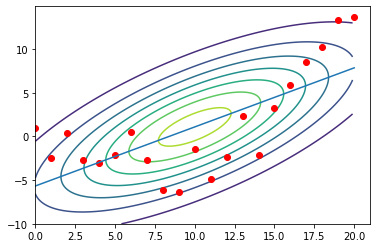

In [179]:
plt.show()